In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
house = pd.read_csv(r"D:\KULIAH DIFA\Semester 7 HUHU\Machine Learning\Minggu 5\kc_house_data.csv")

In [3]:
house

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          1180.0              0      1955             0    98178  47.5112   
1          2170.0            400      1951          1991    98125  47.7210   
2           770.0              0      1933             0    98028  47.7379   
3          1050.0            910      1965             0    98136  47.5208   
4          1680.0              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608      1530.0              0      2009             0    98103  47.6993   
21609      2310.0              0      2014             0    98146  47.5107   
21610      1020.0              0      2009             0    98144  47.5944   
21611      1600.0              0      2004             0    98027  47.5345   
21612      1020.0              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
print(house.nunique(axis=0))

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house['date'] = pd.to_datetime(house['date'])

In [9]:
house['month'] = house['date'].apply(lambda date: date.month)
house['year'] = house['date'].apply(lambda date: date.year)

In [10]:
house.drop('id',inplace=True,axis=1)
house.drop('date',inplace=True,axis=1)

In [11]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [12]:
house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...  sqft_basement      yr_built  yr_renovated       zipcode  \
count  ...   21613.000000  21613.000000  21613.000000  21613.000000   
mean   ...     291.509045   1971.005136     84.402258  98077.939805   
std    ...     442.575043     29.373411    401.679240     53.505026   
min    ...       0.000000   1900.000000      0.000000  98001.000000   
25%    ...       0.000000   1951.000000      0.000000  98033.000000   
50%    ...       0.000000   1975.000000      0.000000  98065.000000   
75%    ...     560.000000   1997.000000      0.000000  98118.000000   
max    ...    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         month  \
count  21613.000000  21613.000000   21613.000000   21613.000000  21613.000000   
mean      47.560053   -122.213896    1986.552492   12768.455652      6.574423   
std        0.138564      0.140828     685.391304   27304.179631      3.115308   
min       47.155900   -122.519000     399.000000     651.000000      1.000000   
25%       47.471000   -122.328000    1490.000000    5100.000000      4.000000   
50%       47.571800   -122.230000    1840.000000    7620.000000      6.000000   
75%       47.678000   -122.125000    2360.000000   10083.000000      9.000000   
max       47.777600   -121.315000    6210.000000  871200.000000     12.000000   

               year  
count  21613.000000  
mean    2014.322954  
std        0.467616  
min     2014.000000  
25%     2014.000000  
50%     2014.000000  
75%     2015.000000  
max     2015.000000  

[8 rows x 21 columns]

In [13]:
bedrooms = (house.bedrooms == 0).sum()
bathrooms = (house.bathrooms == 0).sum()

print("Nilai 0 di kolom bedrooms ada: ", bedrooms)
print("Nilai 0 di kolom y bathrooms: ", bathrooms)

Nilai 0 di kolom bedrooms ada:  13
Nilai 0 di kolom y bathrooms:  10


In [14]:
house.loc[(house['bathrooms']==0)]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
875    1095000.0         0        0.0         3064      4764     3.5   
1149     75000.0         1        0.0          670     43377     1.0   
3119    380000.0         0        0.0         1470       979     3.0   
5832    280000.0         1        0.0          600     24501     1.0   
6994   1295650.0         0        0.0         4810     28008     2.0   
9773    355000.0         0        0.0         2460      8049     2.0   
9854    235000.0         0        0.0         1470      4800     2.0   
10481   484000.0         1        0.0          690     23244     1.0   
14423   139950.0         0        0.0          844      4269     1.0   
19452   142000.0         0        0.0          290     20875     1.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
875             0     2          3      7  ...              0      1990   
1149            0     0          3      3  ...              0      1966   
3119            0     2          3      8  ...              0      2006   
5832            0     0          2      3  ...              0      1950   
6994            0     0          3     12  ...              0      1990   
9773            0     0          3      8  ...              0      1990   
9854            0     0          3      7  ...              0      1996   
10481           0     0          4      7  ...              0      1948   
14423           0     0          4      7  ...              0      1913   
19452           0     0          1      1  ...              0      1963   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
875               0    98102  47.6362 -122.322           2360        4000   
1149              0    98022  47.2638 -121.906           1160       42882   
3119              0    98133  47.7145 -122.356           1470        1399   
5832              0    98045  47.5316 -121.749            990       22549   
6994              0    98053  47.6642 -122.069           4740       35061   
9773              0    98031  47.4095 -122.168           2520        8050   
9854              0    98065  47.5265 -121.828           1060        7200   
10481             0    98053  47.6429 -121.955           1690       19290   
14423             0    98001  47.2781 -122.250           1380        9600   
19452             0    98024  47.5308 -121.888           1620       22850   

       month  year  
875        6  2014  
1149       2  2015  
3119       2  2015  
5832      11  2014  
6994       6  2014  
9773       4  2015  
9854      12  2014  
10481      9  2014  
14423      4  2015  
19452      9  2014  

[10 rows x 21 columns]

In [16]:
house = house.loc[(house[['bedrooms','bathrooms']]!=0).all(axis=1)]

In [17]:
house.shape

(21597, 21)

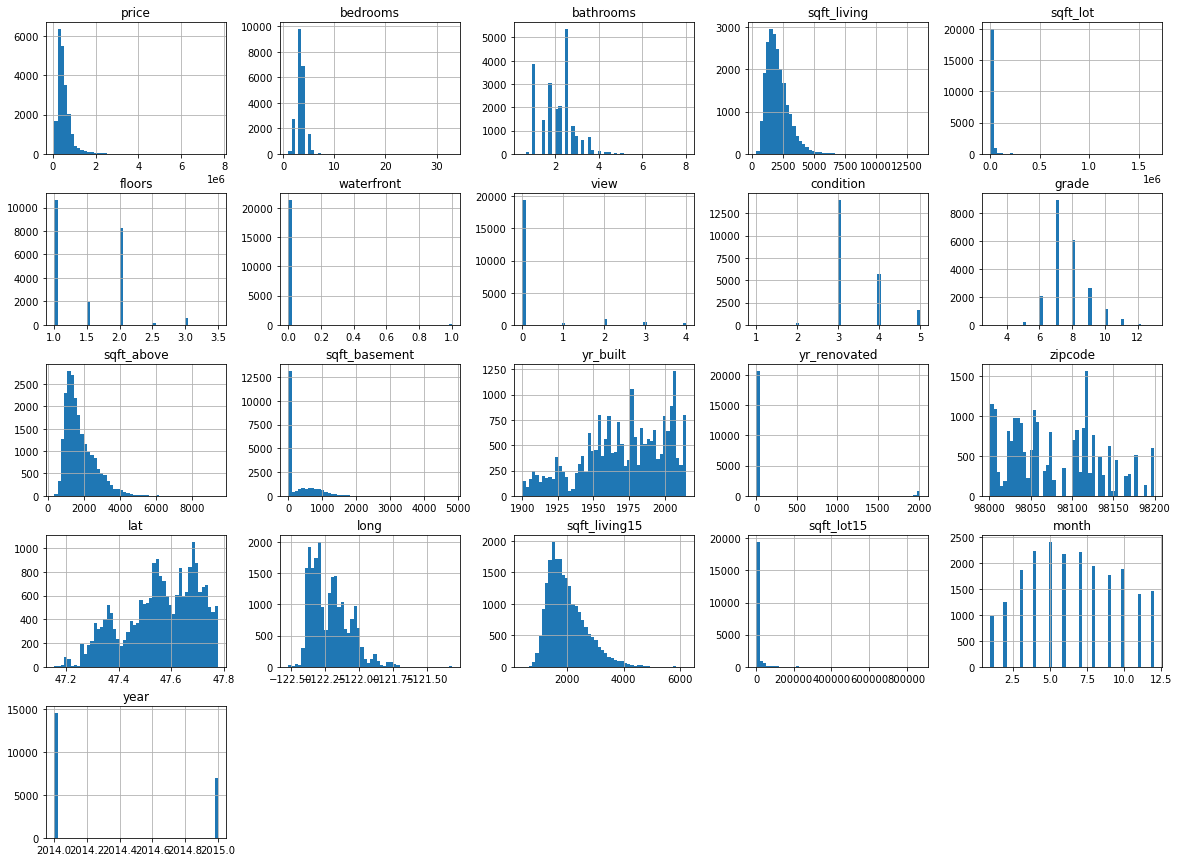

In [18]:
house.hist(bins=50, figsize=(20,15))
plt.show()

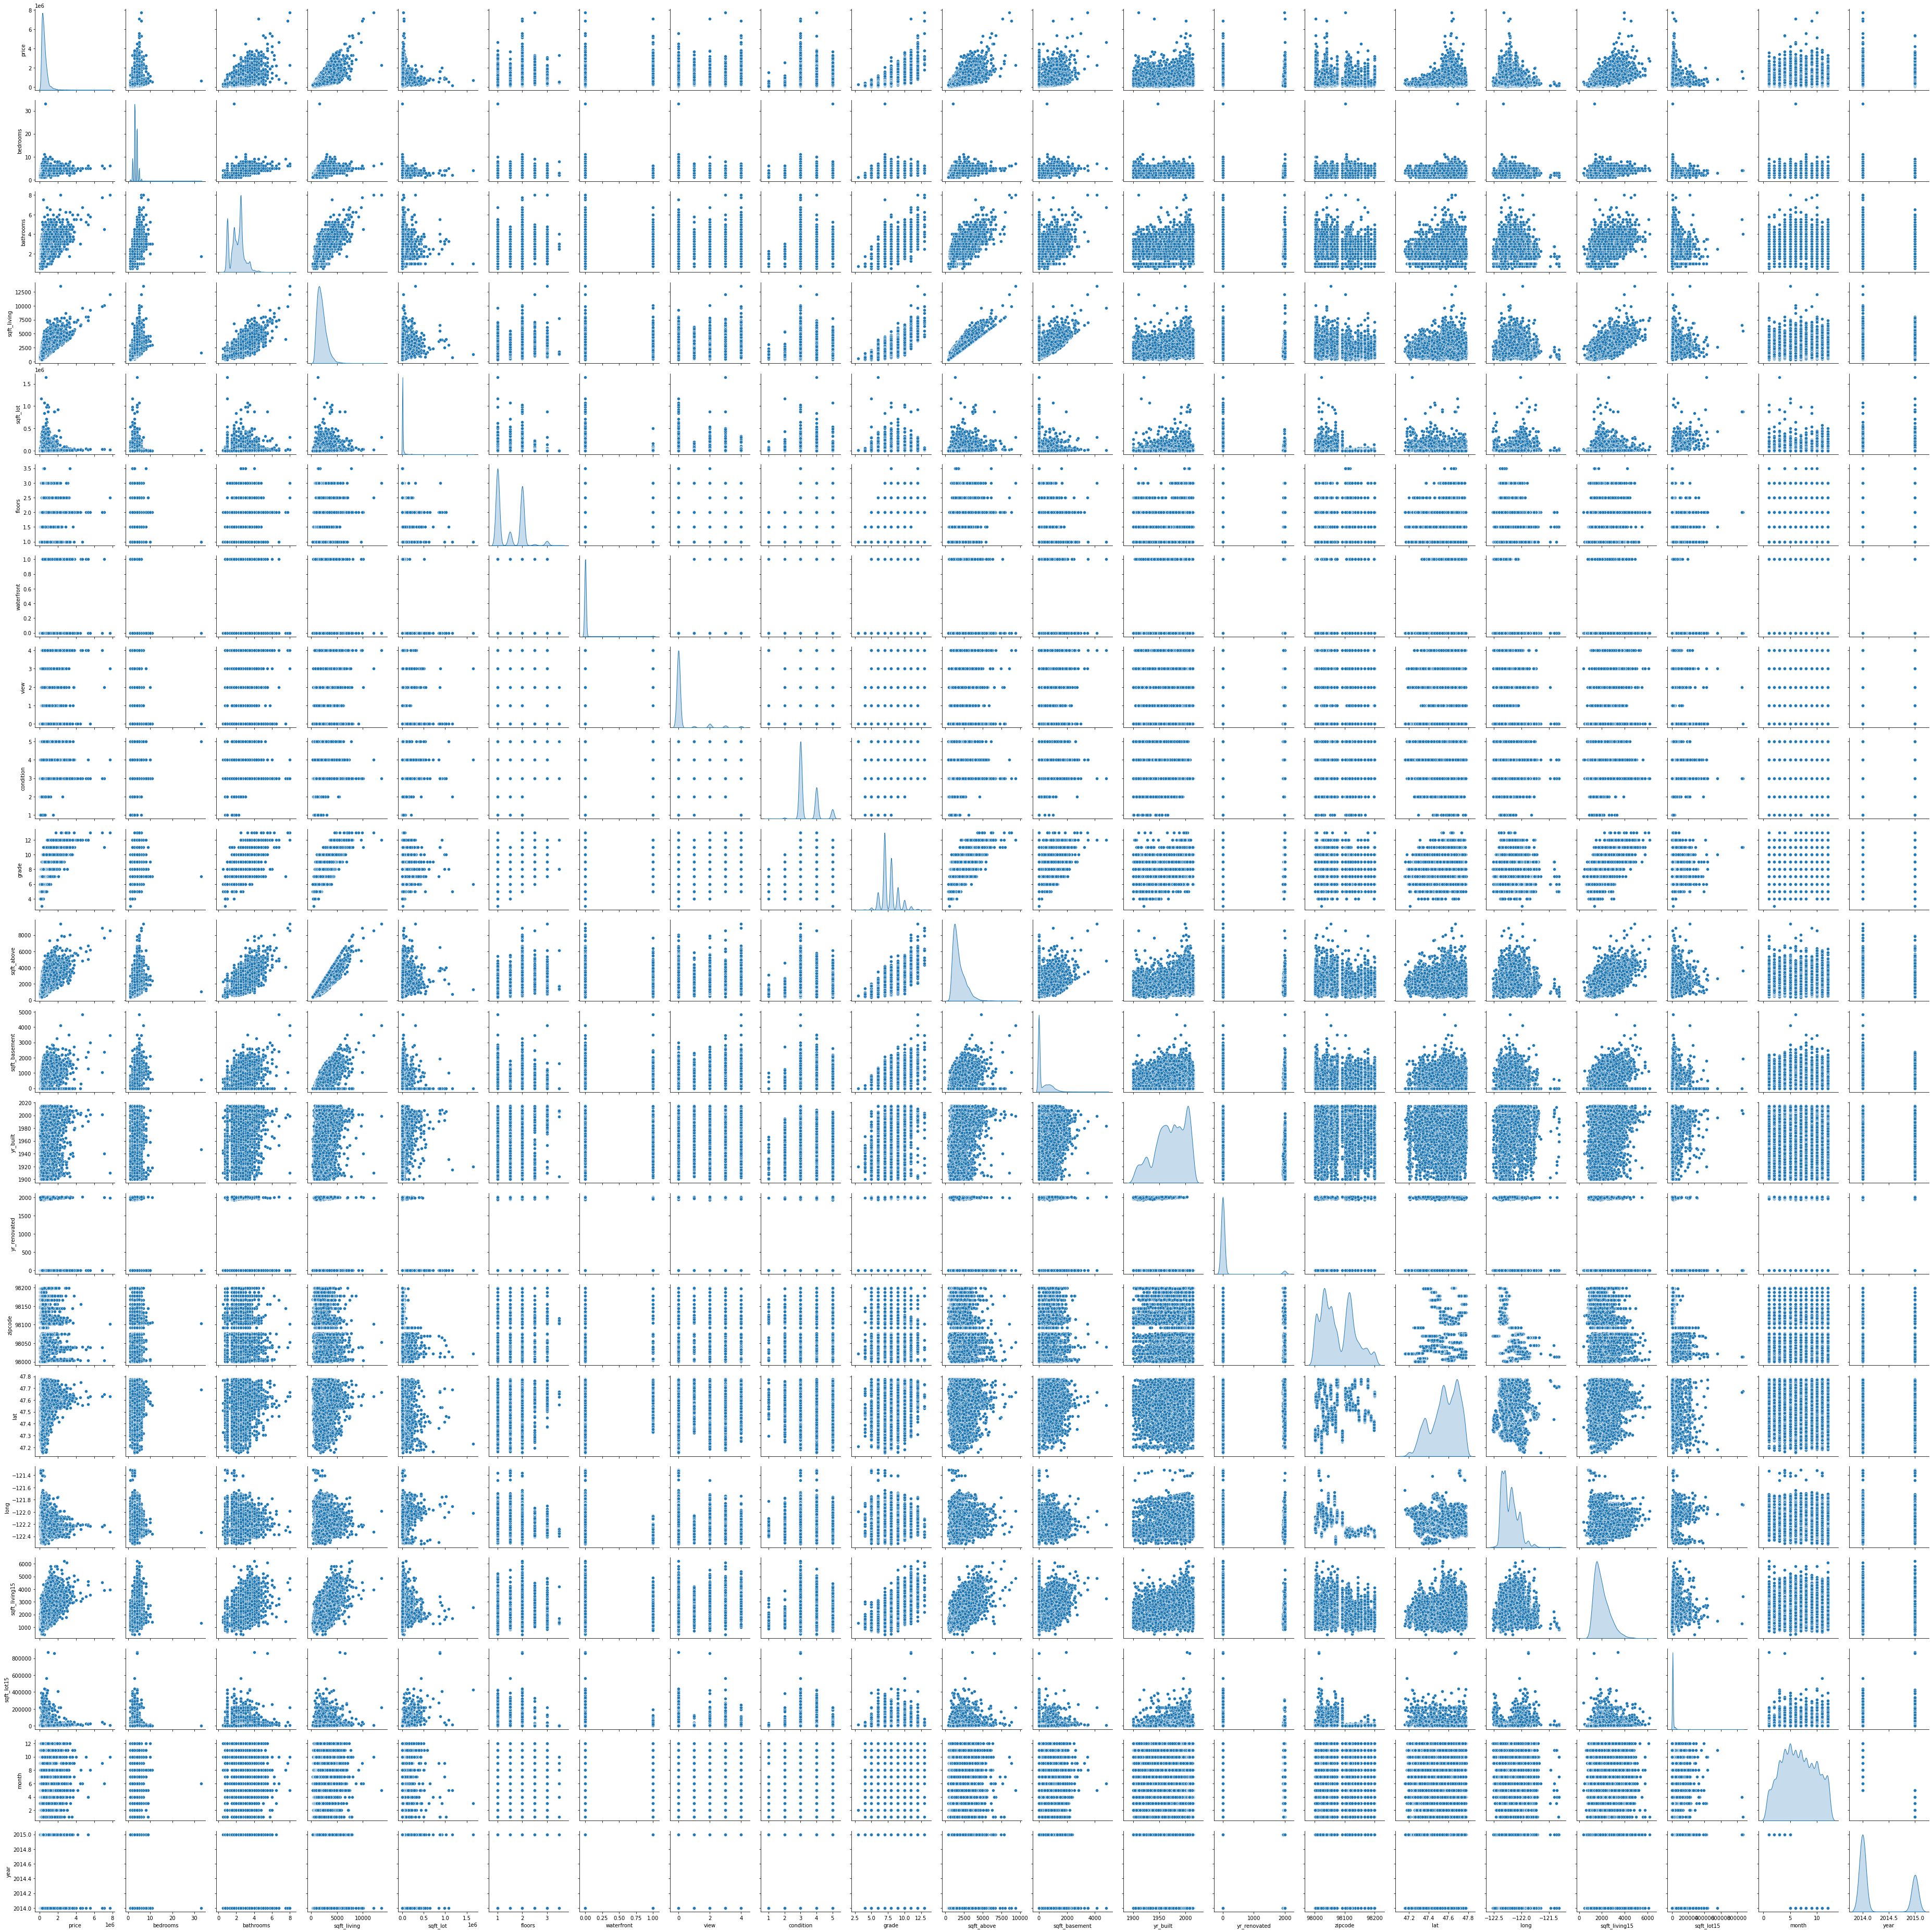

In [19]:
sns.pairplot(house, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

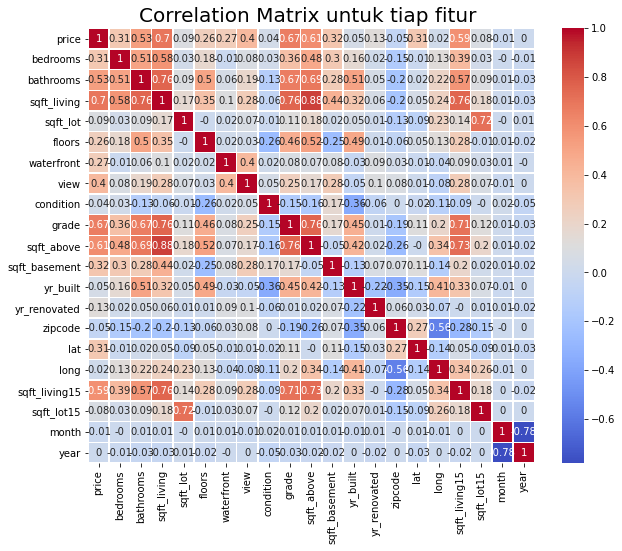

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [22]:
#Inisialisasi atribut dan target
X = house[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']]
y = house['price']

In [23]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [25]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 21597
Total # sampel di seluruh dataset: 19437
Total # sampel di seluruh datasett: 2160


In [34]:

#Standarisasi Data Latih
numerical_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()
     

<ipython-input-34-7506605bc970>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

bathrooms  sqft_living     grade  sqft_above  sqft_living15
2052   -0.476885    -0.393168  0.290273   -0.083769      -0.477134
13755   0.172652     0.280744 -0.561997   -0.698102      -0.026114
10971   0.497420    -0.273603  0.290273   -0.324684       0.163023
15891  -1.451189    -1.164907 -1.414267   -0.939017      -0.869958
14118   0.172652     0.226396  0.290273    0.602838       1.108710

In [28]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

bathrooms  sqft_living       grade  sqft_above  sqft_living15
count  19437.0000   19437.0000  19437.0000  19435.0000     19437.0000
mean      -0.0000       0.0000      0.0000      0.0000         0.0000
std        1.0000       1.0000      1.0000      1.0000         1.0000
min       -2.1007      -1.8497     -3.9711     -1.6979        -2.3118
25%       -0.4769      -0.7084     -0.5620     -0.7222        -0.7245
50%        0.1727      -0.1866     -0.5620     -0.2765        -0.2153
75%        0.4974       0.5090      0.2903      0.5065         0.5558
max        7.6423      12.4546      4.5516      9.1794         6.1427

In [36]:
#Standarisasi Data Uji
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [41]:
from sklearn.impute import SimpleImputer
#Inisialisasi SimpleImputer dengan strategi pengisian nilai rata-rata
imputer = SimpleImputer(strategy='mean')

#Fit dan transform data latih
X_train_imputed = imputer.fit_transform(X_train)

#Mengisi nilai-nilai yang hilang di data uji
X_test_imputed = imputer.transform(X_test)

In [42]:
#Decision Tree
dtr = DecisionTreeRegressor(random_state=42)

#Melatih model Decision Tree Regressor pada data yang telah diimputasi
dtr.fit(X_train_imputed, y_train)

#Evaluasi model
score_dtr = dtr.score(X_train_imputed, y_train)
print(score_dtr)


0.9942582610647696


In [43]:

#Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=500)

#Melatih model RandomForest Regressor pada data yang telah diimputasi
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train_imputed, y_train)

#Evaluasi model
score_rfr = rfr.score(X_train_imputed, y_train)
print(score_rfr)

0.9413366019351006


In [44]:
#KNN
knr = KNeighborsRegressor(n_neighbors = 2)

#Melatih model KNeighbors Regressor pada data yang telah diimputasi
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train_imputed, y_train)

#Evaluasi model
score_knr = knr.score(X_train_imputed, y_train)
print(score_knr)

0.8256830818393074


In [46]:
#Inisialisasi DataFrame RMSE
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR', 'RFR', 'KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}

for name, model in model_dict.items():
    #Lakukan imputasi untuk data latih dan data uji
    X_train_imputed = imputer.transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    #Hitung RMSE untuk data latih dan data uji
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_imputed))/1e3)
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_imputed))/1e3)

rmse

train           test
DTR    883.47378   56173.892266
RFR  2823.940565  127616.278435
KNR  4867.900735  138574.755982

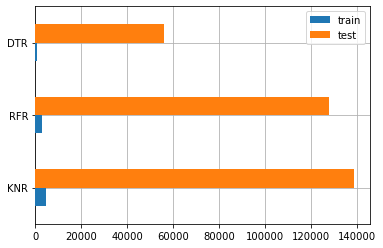

In [47]:
#Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
#Uji model dengan data test
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_DTR  prediksi_RFR  prediksi_KNR
21585  270000.0     2280000.0     4570055.4     4990000.0